<a href="https://colab.research.google.com/github/345lakshayaggarwal-prog/EDA-Using-Python/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EXPLOATORY DATA ANALYSIS**

**Step-by-Step EDA Process**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Load Data & Initial Inspection
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic.csv")
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Data Shape: (887, 8)

Data Types:
 Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Missing Values:
 Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [ ]:
# 2. Summary Statistics
print("\nSummary Stats:\n", df.describe(include='all'))


Summary Stats:
           Survived      Pclass                Name   Sex         Age  \
count   887.000000  887.000000                 887   887  887.000000   
unique         NaN         NaN                 887     2         NaN   
top            NaN         NaN  Mr. Patrick Dooley  male         NaN   
freq           NaN         NaN                   1   573         NaN   
mean      0.385569    2.305524                 NaN   NaN   29.471443   
std       0.487004    0.836662                 NaN   NaN   14.121908   
min       0.000000    1.000000                 NaN   NaN    0.420000   
25%       0.000000    2.000000                 NaN   NaN   20.250000   
50%       0.000000    3.000000                 NaN   NaN   28.000000   
75%       1.000000    3.000000                 NaN   NaN   38.000000   
max       1.000000    3.000000                 NaN   NaN   80.000000   

        Siblings/Spouses Aboard  Parents/Children Aboard       Fare  
count                887.000000               88

In [ ]:
# 3. Handle Missing Values (Simple Imputation for EDA)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Survived'].fillna(df['Survived'].mode()[0], inplace=True)

/tmp/ipython-input-58209869.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-58209869.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

**Correlation & Relationships**

<Axes: >

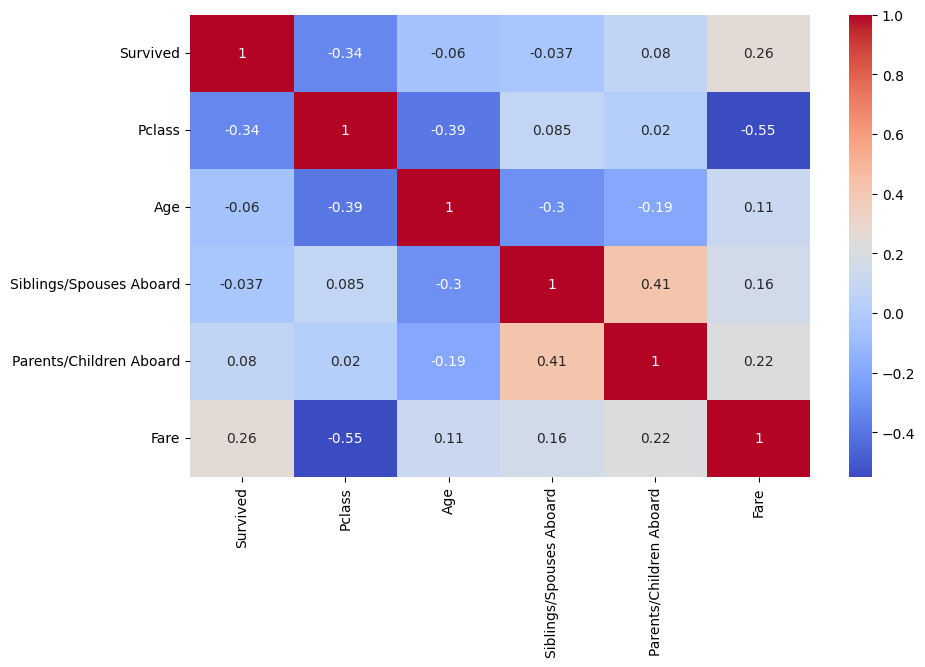

In [ ]:
# Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [ ]:
# Cross-Tabulation (Categorical Relationships)
pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.564682,24.435318


**Outlier Detection**

Text(0.5, 1.0, 'Fare Outliers')

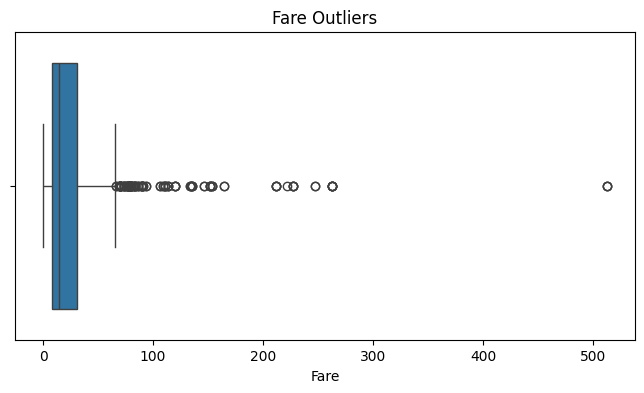

In [ ]:
# Boxplot for Fare Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare']).set_title('Fare Outliers')

In [ ]:
# Z-Score Analysis
from scipy import stats
z_scores = np.abs(stats.zscore(df['Fare']))
outliers = df[z_scores > 3]
print(f"Found {len(outliers)} fare outliers")

Found 20 fare outliers


**Advanced Visualizations**

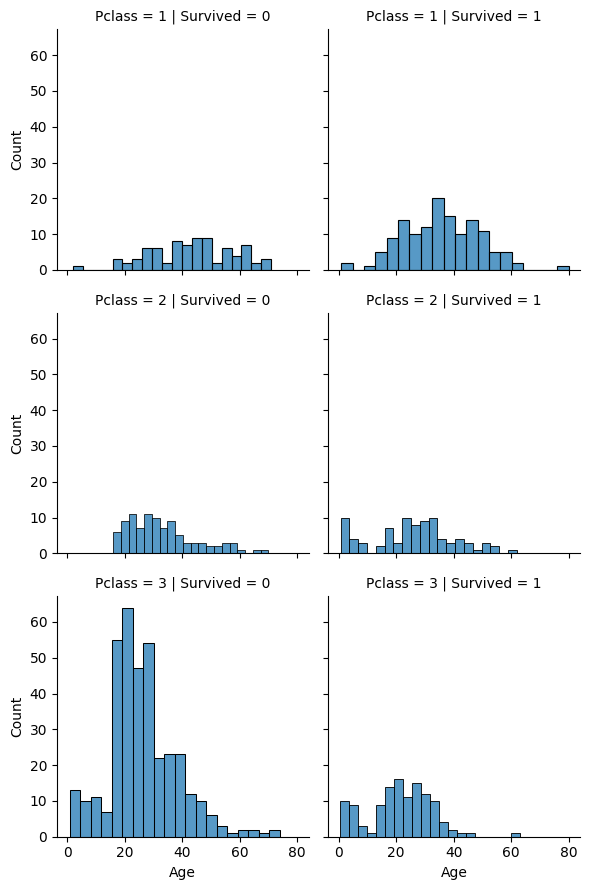

In [ ]:
# Faceted Analysis
g = sns.FacetGrid(df, col='Survived', row='Pclass', height=3)
g.map(sns.histplot, 'Age', bins=20)

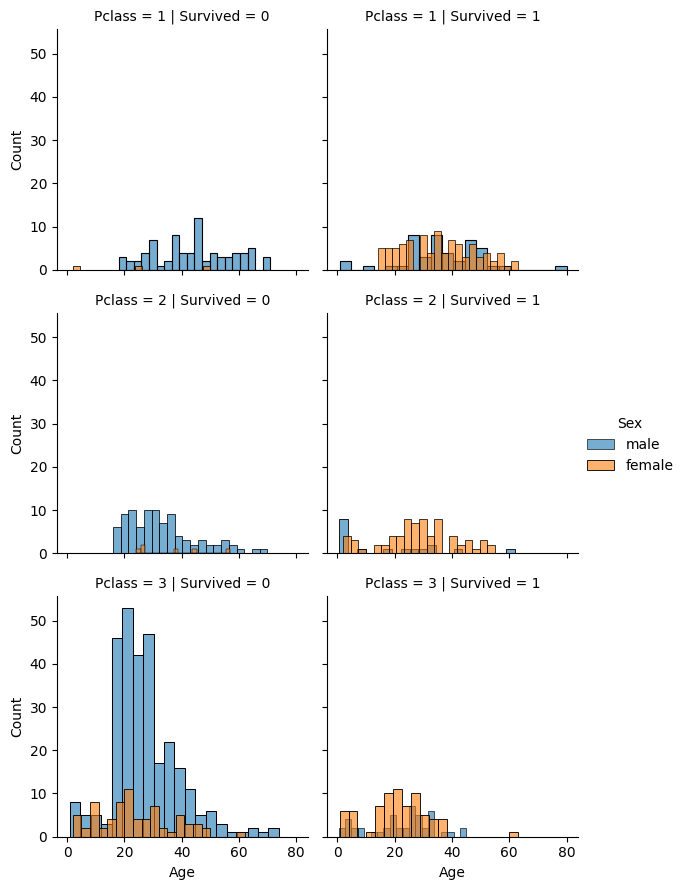

In [ ]:
g = sns.FacetGrid(df, col='Survived', row='Pclass', hue='Sex', height=3)
g.map(sns.histplot, 'Age', bins=20, alpha=0.6)
g.add_legend()

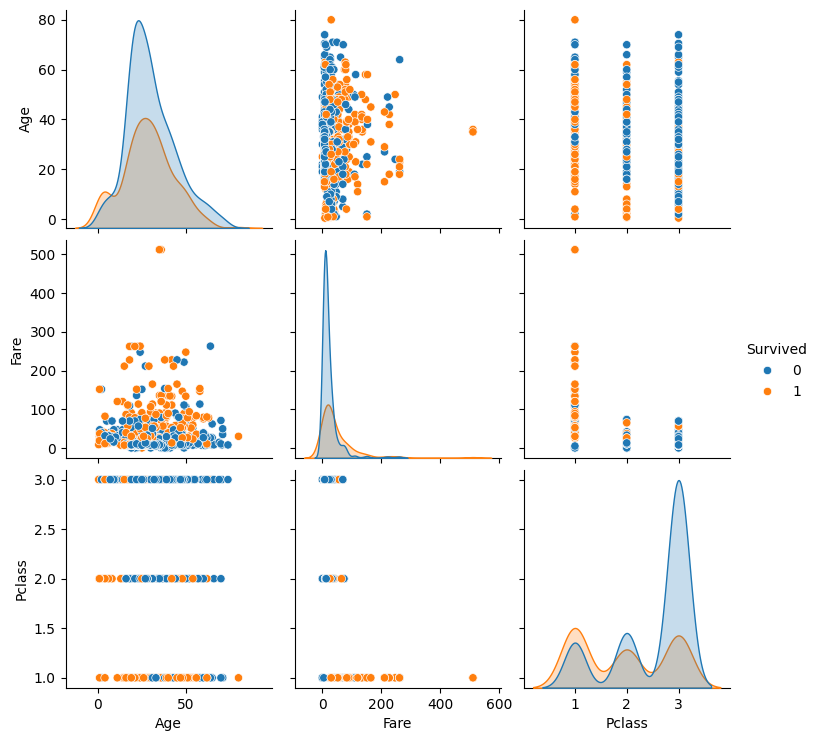

In [ ]:
# Pairplot for Multivariate Analysis
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')